In [1]:
from xlrd import open_workbook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import newaxis
import math


Using TensorFlow backend.
/home/seifhelal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(6)
data = open_workbook('data3.xls')
for sheet in data.sheets():
    values = []
    for row in range(sheet.nrows):
        col_value = []
        for col in range(sheet.ncols):
            value  = (sheet.cell(row,col).value)
            try : value = float(value)
            except : pass
            col_value.append(value)
        values.append(col_value)
values=values[7:2534]
t=[]
for i in range (len(values)):
    t.append(values[i][3])
values=np.array(t)
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values.reshape(-1, 1))

In [3]:
def get_data(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

In [4]:
look_back=3
X_train, Y_train = get_data(values[:2050], look_back)
X_test, Y_test = get_data(values[2050:], look_back)    
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test) 
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
model = Sequential()
model.add(LSTM(
    input_shape=(1, look_back),
    output_dim=30,
    return_sequences=False
))
model.add(Dropout(2.2))
model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))
start = time.time()
model.compile('rmsprop','mse')
history=model.fit(X_train,Y_train,batch_size=1,nb_epoch=75,validation_split=0.1)

/home/seifhelal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(1, 3), return_sequences=False, units=30)`
  """
/home/seifhelal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if __name__ == '__main__':
/home/seifhelal/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1886 samples, validate on 210 samples
Epoch 1/75
1886/1886 [==============================] - 5s 3ms/step - loss: 0.0039 - val_loss: 4.0176e-04
Epoch 2/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.2295e-04 - val_loss: 1.0344e-04
Epoch 3/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.1765e-04 - val_loss: 1.2326e-04
Epoch 4/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.0907e-04 - val_loss: 1.1560e-04
Epoch 5/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.0724e-04 - val_loss: 3.7249e-04
Epoch 6/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.0478e-04 - val_loss: 3.0692e-04
Epoch 7/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.0702e-04 - val_loss: 1.0028e-04
Epoch 8/75
1886/1886 [==============================] - 5s 3ms/step - loss: 1.0043e-04 - val_loss: 1.0570e-04
Epoch 9/75
1886/1886 [==============================] - 5s 3ms/step - loss: 9

In [16]:
#train_data prediction and score 
prediction_training = model.predict(X_train)
prediction_training = scaler.inverse_transform(prediction_training)
Y_train_inv = scaler.inverse_transform(Y_train)
score_train=0
for i in range (Y_train_inv.shape[0]):
    score_train += math.sqrt(mean_squared_error(Y_train_inv[i], prediction_training[i]))
score_train=score_train/Y_train_inv.shape[0]

#test_data prediction and score 
prediction_test = model.predict(X_test)
prediction_test = scaler.inverse_transform(prediction_test)
Y_test_inv = scaler.inverse_transform(Y_test)
score_test=0
for i in range (Y_test_inv.shape[0]):
    score_test += math.sqrt(mean_squared_error(Y_test_inv[i],prediction_test[i]))
score_test=score_test/Y_test_inv.shape[0]

print('Average Training Difference: %.2f ' % (score_train))
print('Average Testing Difference: %.2f ' % (score_test))
print('Train Accuracy: %.2f RMSE' % (100-score_train))
print('Test Accuracy: %.2f RMSE' % (100-score_test))

Average Training Difference: 12.29 
Average Testing Difference: 12.67 
Train Accuracy: 87.71 RMSE
Test Accuracy: 87.33 RMSE


day  1 :  [[ 2738.56518555]]
day  2 :  [[ 2732.64477539]]
day  3 :  [[ 2727.31884766]]
day  4 :  [[ 2721.88598633]]
day  5 :  [[ 2716.83642578]]
Validation loss


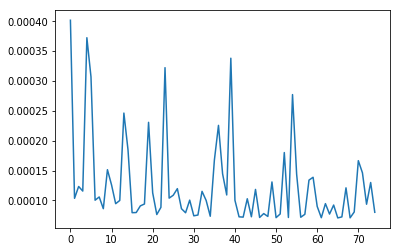

Training loss


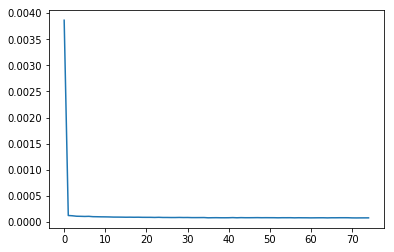

In [17]:
#get X_test
trial=Y_test[Y_test.shape[0]-look_back:]

for i in range (5):
    previous=trial[trial.shape[0]-look_back:trial.shape[0]].reshape(1,3)
    previous=np.reshape(previous, (previous.shape[0], 1, look_back))
    y_prev= model.predict(previous)
    print ("day ",i+1,": ",scaler.inverse_transform(y_prev)+30)
    trial=np.append(trial,y_prev)
    
print ("Validation loss")
plt.plot(np.array(history.history['val_loss']))
plt.show()
print ("Training loss")
plt.plot(np.array(history.history['loss']))
plt.show()